In [1]:
pip install pandas numpy matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = r"C:\Users\saadk\Downloads\DataSet\Student Performance\StudentPerformance.xlsx"


In [7]:
data = pd.read_excel(file_path)

In [9]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [13]:
print(data.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [15]:
summary = data.describe()
print(summary)

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

In [25]:
grouped_data = data.groupby('Parental_Involvement')['Exam_Score'].mean()
print(grouped_data)

Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64


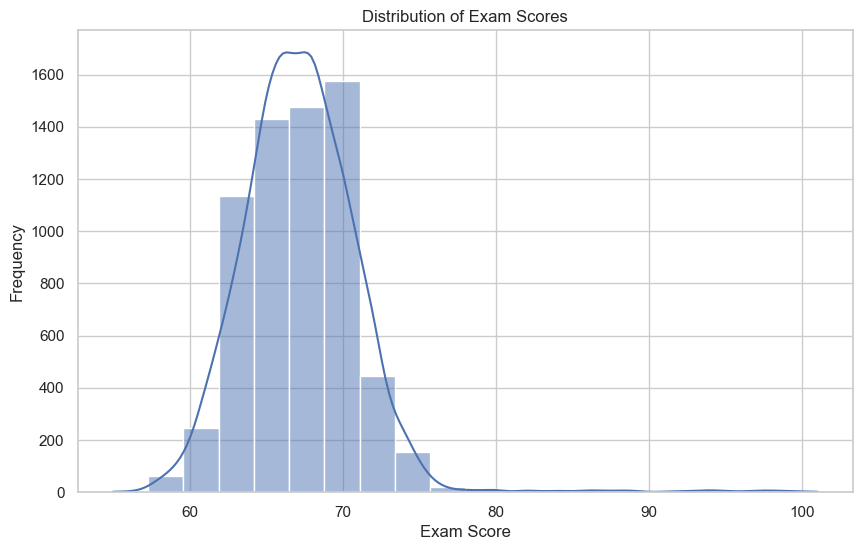

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

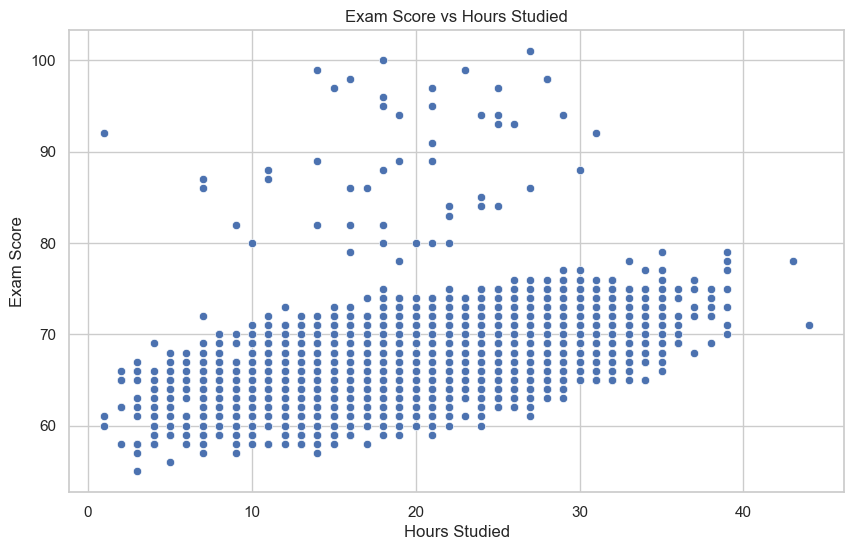

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data)
plt.title('Exam Score vs Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

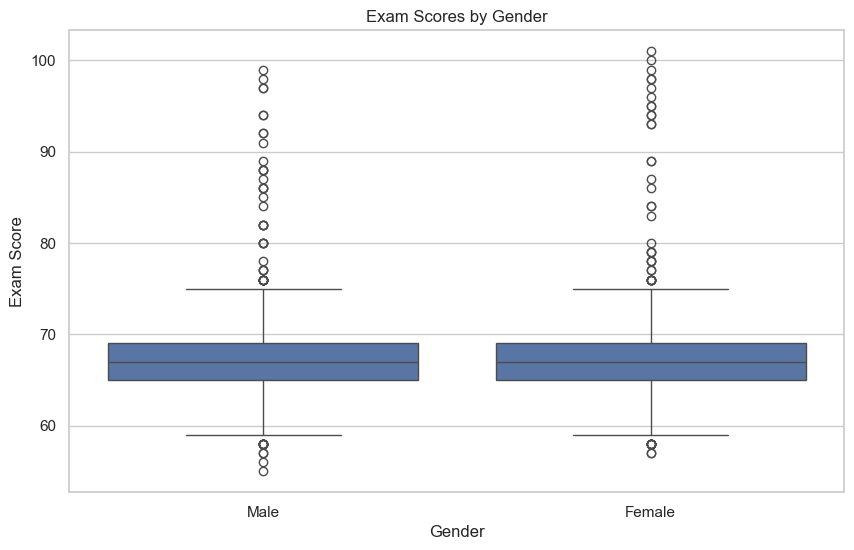

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=data)
plt.title('Exam Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()

Non-numeric columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


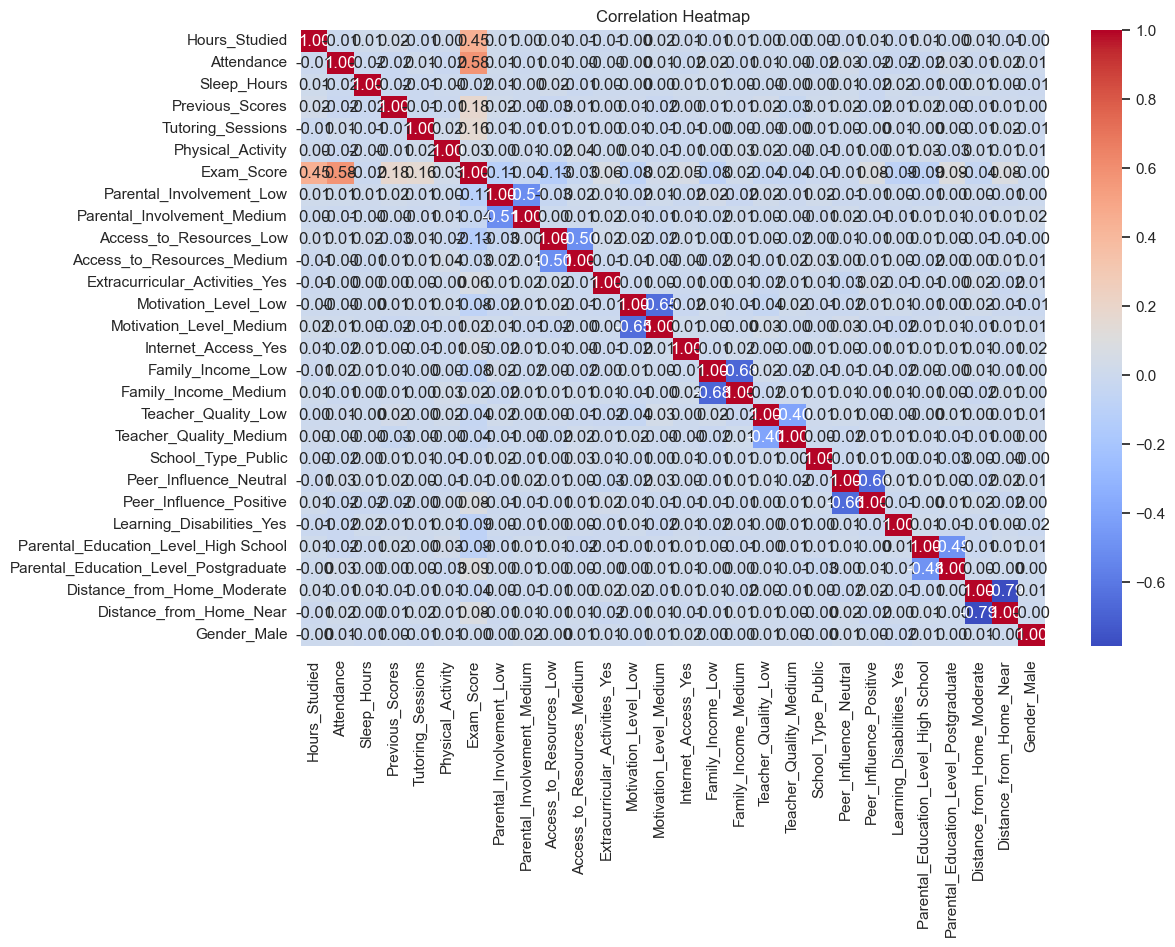

In [52]:
# Identify non-numeric columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

# Option 1: Convert categorical columns to numeric using pd.get_dummies()
# This will create one-hot encoded variables for categorical features
data_encoded = pd.get_dummies(data, columns=non_numeric_cols, drop_first=True)

# Option 2: If you want to convert specific categorical variables to numeric codes
# Uncomment and modify this if you have specific columns you want to encode
# for col in non_numeric_cols:
#     data[col] = data[col].astype('category').cat.codes

# Now calculate the correlation matrix again
correlation = data_encoded.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


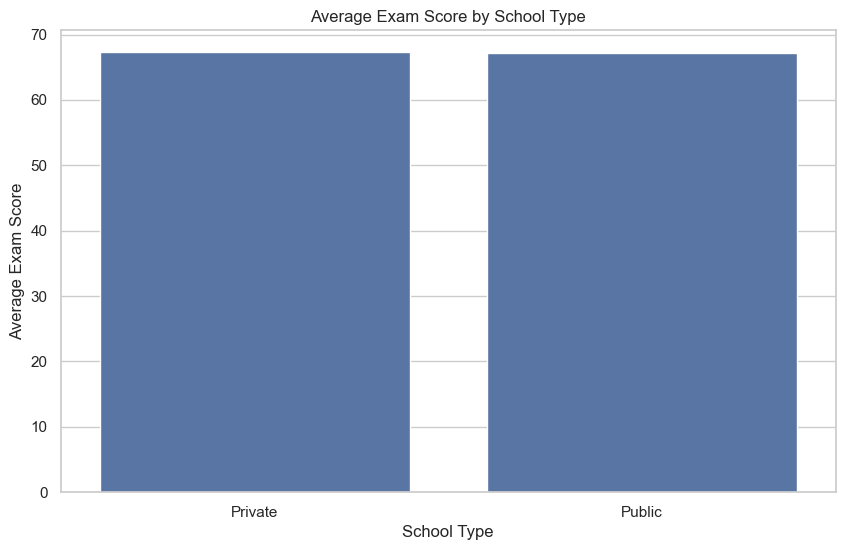

In [46]:
school_type_group = data.groupby('School_Type')['Exam_Score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='School_Type', y='Exam_Score', data=school_type_group)
plt.title('Average Exam Score by School Type')
plt.xlabel('School Type')
plt.ylabel('Average Exam Score')
plt.show()

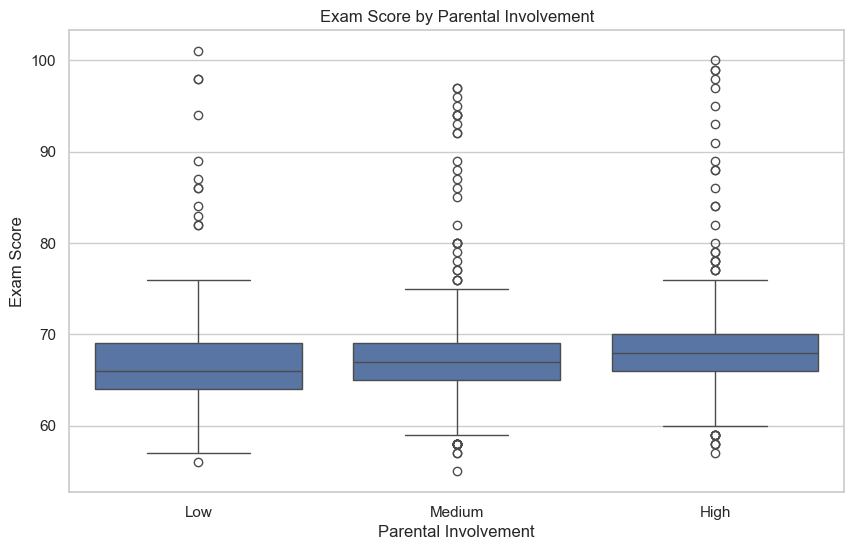

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data)
plt.title('Exam Score by Parental Involvement')
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

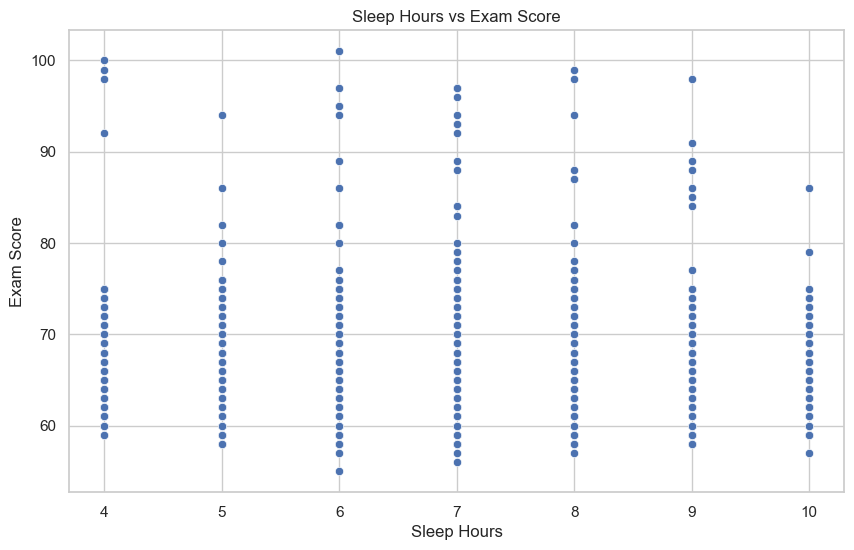

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=data)
plt.title('Sleep Hours vs Exam Score')
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()

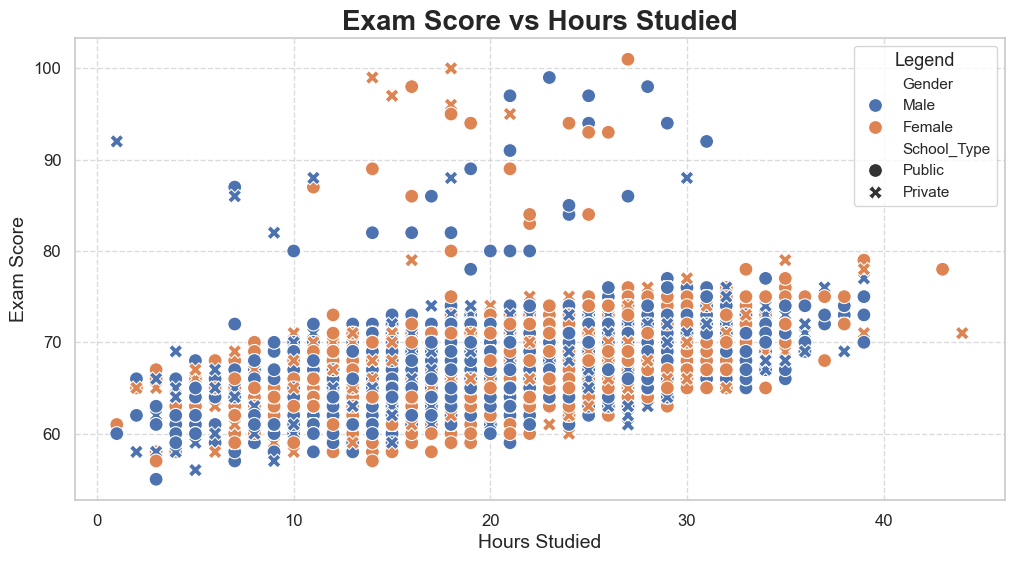

In [54]:
# Enhanced scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=data, 
                hue='Gender', style='School_Type', 
                palette='deep', s=100, edgecolor='w')

plt.title('Exam Score vs Hours Studied', fontsize=20, fontweight='bold')
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Legend', title_fontsize='13', fontsize='11')
plt.show()
